In [1]:
import numpy as np
from time import time
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import XTC, GRO
import MDAnalysis.analysis.rms
from MDAnalysis.analysis.rms import rmsd
from MDAnalysis.analysis import align
import MDAnalysis.analysis.hbonds
import matplotlib.pyplot as plt
import itertools as it
import pandas as pd

/Users/owner/opt/anaconda3/lib/python3.8/site-packages/MDAnalysis/analysis/hbonds/hbond_analysis.py:342: DeprecationWarning: This module is deprecated as of MDAnalysis version 1.0.It will be removed in MDAnalysis version 2.0Please use MDAnalysis.analysis.hydrogenbonds.hbond_analysis instead.
  warnings.warn(


In [212]:
df = pd.read_excel('/Volumes/2KSPAT/Kumar/EGFR_del747_750_insP.xlsx')

In [213]:
df

,peptide,median residue number,mean,SD
0,LRILKETE,707.5,55.160347,4.460996
1,LRILKETEF,708.0,47.615058,3.818857
2,LRILKETEFKKIKVLGSGA,713.0,48.195507,1.124384
3,LRILKETEFKKIKVLGSGAF,713.5,48.184234,0.949346
4,RILKETE,708.0,56.876976,1.165442
...,...,...,...,...
57,DEEDM,1005.0,92.522076,1.046401
58,DDVVDADE,1011.5,93.521982,2.940600
59,DVVDADE,1012.0,95.532127,3.419720
60,VVDADE,1012.5,96.589027,1.351019


In [247]:
n = 4
df.drop(df.tail(n).index,inplace=True)
df

,peptide,median residue number,mean,SD
0,LRILKETE,707.5,55.160347,4.460996
1,LRILKETEF,708.0,47.615058,3.818857
2,LRILKETEFKKIKVLGSGA,713.0,48.195507,1.124384
3,LRILKETEFKKIKVLGSGAF,713.5,48.184234,0.949346
4,RILKETE,708.0,56.876976,1.165442
5,FKKIKVLGSGAF,717.5,63.372683,2.092084
6,KKIKVLGSGAF,718.0,64.426801,1.631000
7,GTVYKGLWIPEGEKVKIPVA,733.5,28.016323,0.671361
8,ASVDNPHVCRL,772.0,35.874272,3.409708
9,SVDNPHVCRL,772.5,34.833629,2.648338


In [214]:
h = np.loadtxt('/Volumes/2KSPAT/Kumar/EGFR_del747_750_insP.txt',delimiter=" ")

In [20]:
h

In [216]:
len(h)

316

In [217]:
h[:,1][1:3]

array([0.17528247, 0.00459954])

In [218]:
np.sum(h[:,1][1:3])

0.1798820117988201

In [219]:
with open('/Volumes/2KSPAT/Kumar/del747_750_insP/protein.gro') as f:
    
    lines = f.readlines()
   

new_lines = []    
# Get rid of empty lines
for line in lines:
    # Strip whitespace, should leave nothing if empty line was just "\n"
    if not line.strip():
        continue
    # We got something, save it
    else:
        new_lines.append(line)
        
lines = new_lines[2:]


y1 = [] # stores the active coordinates

for i in range(0,len(lines)):
    
    words = lines[i].split()
    y1.append(words[0]) 

             



In [220]:
res = []
for i in y1:
    if i not in res:
        res.append(i)
        

In [19]:
res

In [222]:
res.pop(-1)

'7.69160'

In [18]:
res

In [224]:
len(res)

313

In [225]:
res[0]

'695GLY'

In [226]:
w1 = []
w2 = []
for i in range(0,len(res)):
    w1.append(res[i][-3:])
    num = ""
    for cq in res[i]:
        if cq.isdigit():
            num = num + cq
    w2.append(num)    

In [17]:
w1

In [16]:
w2 = np.array(w2)
w2.astype(int)

In [229]:
h[:,0].astype(int)[0]

695

In [15]:
h[:,0][i].astype(int)
h[:,0][i].astype(int) == w2.astype(int)

In [14]:
new_h = []
wq = []
for i in range(0,len(h)):
    if h[:,0][i].astype(int) in w2.astype(int):
        wq = [h[:,0][i].astype(int), h[:,1][i]]
        new_h.append(wq)
new_h

In [232]:
new_h = np.array(new_h)
len(new_h)

313

In [13]:
new_h

In [234]:
new_h[:,0][1:3]

array([696., 697.])

In [235]:
len(res)

313

In [236]:
res[0][-3:]

'GLY'

In [237]:
res[0]

'695GLY'

In [12]:
w1

In [11]:
w2

In [240]:
len(w2)

313

In [241]:
w3 = []
for i in range(0,len(w1)):
    if w1[i] == 'ALA':
        w3.append('A')
        
    elif w1[i] == 'ARG':
        w3.append('R')
        
    elif w1[i] == 'ASN':
        w3.append('N')
        
    elif w1[i] == 'ASP':
        w3.append('D')
        
    elif w1[i] == 'CYS':
        w3.append('C')
        
    elif w1[i] == 'GLN':
        w3.append('Q')
        
    elif w1[i] == 'GLU':
        w3.append('E')
        
    elif w1[i] == 'GLY':
        w3.append('G')
        
    elif w1[i] == 'HIE' or w1[i] == 'HIS' :
        w3.append('H')
        
    elif w1[i] == 'ILE':
        w3.append('I')
        
    elif w1[i] == 'LEU':
        w3.append('L')
        
    elif w1[i] == 'LYS':
        w3.append('K')
        
    elif w1[i] == 'MET':
        w3.append('M')
        
    elif w1[i] == 'PHE':
        w3.append('F')
        
    elif w1[i] == 'PRO':
        w3.append('P')
        
    elif w1[i] == 'SER':
        w3.append('S')
        
    elif w1[i] == 'THR':
        w3.append('T')
        
    elif w1[i] == 'TRP':
        w3.append('W')
        
    elif w1[i] == 'TYR':
        w3.append('Y')
        
    elif w1[i] == 'VAL':
        w3.append('V')
    else:
        print(w1[i],i)
               

In [10]:
w3

In [243]:
len(w3)

313

In [244]:
rs = w3[0]
for i in range(1,len(w3)):
    rs = rs+w3[i]
    

In [245]:
rs

'GGEAPNQALLRILKETEFKKIKVLGSGAFGTVYKGLWIPEGEKVKIPVAIKEPTSPKANKEILDEAYVMASVDNPHVCRLLGICLTSTVQLITQLMPFGCLLDYVREHKDNIGSQYLLNWCVQIAKGMNYLEDRRLVHRDLAARNVLVKTPQHVKITDFGLAKLLGAEEKEYHAEGGKVPIKWMALESILHRIYTHQSDVWSYGVTVWELMTFGSKPYDGIPASEISSILEKGERLPQPPICTIDVYMIMVKCWMIDADSRPKFRELIIEFSKMARDPQRYLVIQGDERMHLPSPTDSNFYRALMDEEDMDDV'

In [246]:
len(rs)

313

In [248]:
len(df)

58

In [249]:
df['peptide'][0]

'LRILKETE'

In [9]:
df['peptide']

In [251]:
import re
w5 = []
s_hbond = []
w6 = []

for i in range(0,len(df)):
        a = re.search((df['peptide'][i]), rs)
        print(df['peptide'][i])
        print(a.start())
        r_start = a.start()
        r_end   = a.start() + len(df['peptide'][i]) - 1
        s = new_h[:,1][r_start:r_end+1]
      
        s_hbond.append(np.sum(s)/len(s))
        w5 = [df['median residue number'][i], s_hbond[i]]
        w6.append(w5)
    

LRILKETE
9
LRILKETEF
9
LRILKETEFKKIKVLGSGA
9
LRILKETEFKKIKVLGSGAF
9
RILKETE
10
FKKIKVLGSGAF
17
KKIKVLGSGAF
18
GTVYKGLWIPEGEKVKIPVA
29
ASVDNPHVCRL
69
SVDNPHVCRL
70
DNPHVCRL
72
LGICL
80
TSTVQL
85
TSTVQLI
85
LDYVREHKDNIGSQ
101
LLNWCVQIAKGMN
116
LNWCVQ
117
CVQIAKGMN
120
IAKGMN
123
IAKGMNY
123
YLEDRRLVHRDLAA
129
YLEDRRLVHRDLAARN
129
YLEDRRLVHRDLAARNVL
129
LEDRRLVHRDLAARNVL
130
RRLVHRDLAA
133
RRLVHRDLAARNVL
133
VKTPQHVKITDFGL
147
AKLLGAEE
161
AKLLGAEEKEYHAEGGKVPIKWMAL
161
KEYHAEGGKVPIKWMAL
169
YHAEGGKVPIKWMAL
171
ESILHRIYTHQSDV
186
ESILHRIYTHQSDVWS
186
HRIYTHQSDV
190
HRIYTHQSDVWS
190
WSYGVT
200
VWELMT
206
LMTFGSKPYDGIPASE
209
MTFGSKPYDGIPASE
210
FGSKPYDGIPASE
212
ISSIL
225
ISSILEKGERLPQPPICT
225
ILEKGERLPQPPICT
228
EKGERLPQPPICT
230
IDVYM
243
IMVKCWM
248
VKCWMIDADSRPKFRE
250
WMIDADSRPKFRE
253
WMIDADSRPKFREL
253
IDADSRPKFRE
255
FSKMARDPQRY
270
ARDPQRY
274
LVIQGDE
281
RMHLPSPTDSNF
288
YRALM
300
YRALMDE
300
YRALMDEE
300
DEEDM
305


In [252]:
s = h[:,1][r_start:r_end+1]
s

array([4.99950005e-05, 1.14548545e+00, 1.52984702e-01, 0.00000000e+00,
       5.99940006e-04])

In [253]:
df['peptide'][0]

'LRILKETE'

In [254]:
len(df['peptide'][0])

8

In [ ]:
695 + 9 + len(df['peptide'][0]) - 1

In [8]:
s_hbond    

In [ ]:
df['median residue number']

In [7]:
w6

In [257]:
np.savetxt('/Volumes/2KSPAT/Kumar/EGFR_del747_750_insP_mean_hbond.txt',w6)

In [258]:
len(s_hbond)

58

In [ ]:
len(df['median residue number'])

### PLOT 

In [2]:
wt = np.loadtxt('/Volumes/2KSPAT/Kumar/EGFR_WT_mean_hbond.txt',delimiter=" ") 
l747p = np.loadtxt('/Volumes/2KSPAT/Kumar/EGFR_L747P_mean_hbond.txt',delimiter=" ")
del746_750 = np.loadtxt('/Volumes/2KSPAT/Kumar/EGFR_del746_750_mean_hbond.txt',delimiter=" ")
del747_753_insS = np.loadtxt('/Volumes/2KSPAT/Kumar/EGFR_del747_753_insS_mean_hbond.txt',delimiter=" ")
del747_750_insP = np.loadtxt('/Volumes/2KSPAT/Kumar/EGFR_del747_750_insP_mean_hbond.txt',delimiter=" ")

In [3]:
wt_s = wt[np.argsort(wt[:, 0])]
l747p_s = l747p[np.argsort(l747p[:, 0])]
del746_750_s = del746_750[np.argsort(del746_750[:, 0])]
del747_753_insS_s = del747_753_insS[np.argsort(del747_753_insS[:, 0])]
del747_750_insP_s = del747_750_insP[np.argsort(del747_750_insP[:, 0])]

In [4]:
x = list(range(700,1010,10))
#labels = ['Geeks1', 'Geeks2', 'Geeks3', 'Geeks4']
j = 0
labels = []
for i in range(0,len(x)):
    t = str(x[i])
    
    if j % 5==0:
        labels.append(t)
    else:
        labels.append(' ')
    j = j + 1
labels


['700',
 ' ',
 ' ',
 ' ',
 ' ',
 '750',
 ' ',
 ' ',
 ' ',
 ' ',
 '800',
 ' ',
 ' ',
 ' ',
 ' ',
 '850',
 ' ',
 ' ',
 ' ',
 ' ',
 '900',
 ' ',
 ' ',
 ' ',
 ' ',
 '950',
 ' ',
 ' ',
 ' ',
 ' ',
 '1000']

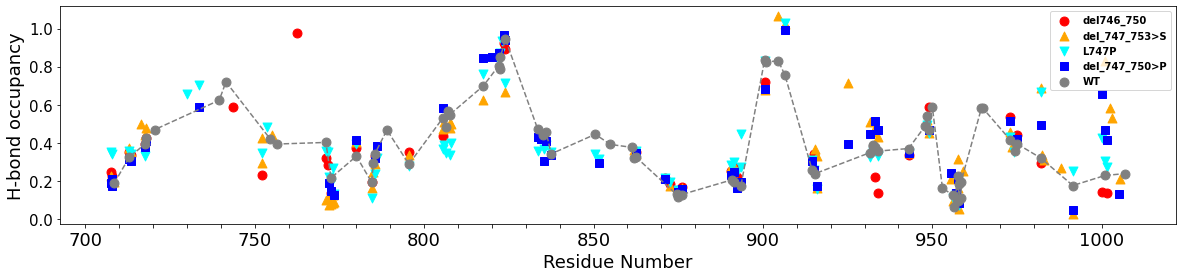

In [262]:
plt.figure(figsize=(20,4))
plt.scatter(del746_750_s[:,0], del746_750_s[:,1],facecolor='red',marker="o",s=80, label='del746_750')
plt.scatter(del747_753_insS_s[:,0], del747_753_insS_s[:,1],facecolor='orange',marker="^",s=80,label='del_747_753>S')
plt.scatter(l747p_s[:,0], l747p_s[:,1],facecolor='cyan',marker="v",s=80, label='L747P')
plt.scatter(del747_750_insP_s[:,0], del747_750_insP_s[:,1],facecolor='blue',marker="s",s=80,label='del_747_750>P')
plt.plot(wt_s[:,0], wt_s[:,1],'--o',color='gray', markerfacecolor='gray')
plt.scatter(wt_s[:,0], wt_s[:,1],facecolor='gray',s=80, label='WT')



plt.xlabel('Residue Number',fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)


plt.xticks(x, labels,fontsize=18)

plt.ylabel('H-bond occupancy',fontsize=18)
#plt.title('EGFR',fontsize=18)
plt.legend(loc="upper right",prop=dict(weight='bold'))
plt.rcParams['axes.linewidth']=3   

plt.savefig('/Volumes/2KSPAT/Kumar/1_EGFR_H_bond_occupancy.png', bbox_inches = 'tight', dpi = 300)
plt.show()

### Mutual Information plot

In [5]:
from pyitlib import discrete_random_variable as drv
df = pd.read_excel('/Volumes/2KSPAT/Kumar/EGFR_del747_750_insP.xlsx')
len(df['mean'])


62

In [6]:
df

,peptide,median residue number,mean,SD
0,LRILKETE,707.5,55.160347,4.460996
1,LRILKETEF,708.0,47.615058,3.818857
2,LRILKETEFKKIKVLGSGA,713.0,48.195507,1.124384
3,LRILKETEFKKIKVLGSGAF,713.5,48.184234,0.949346
4,RILKETE,708.0,56.876976,1.165442
...,...,...,...,...
57,DEEDM,1005.0,92.522076,1.046401
58,DDVVDADE,1011.5,93.521982,2.940600
59,DVVDADE,1012.0,95.532127,3.419720
60,VVDADE,1012.5,96.589027,1.351019


In [6]:
del747_750_insP_s


In [8]:
len(del747_750_insP_s)

58

In [9]:
n = 4
df.drop(df.tail(n).index,inplace=True)
df

,peptide,median residue number,mean,SD
0,LRILKETE,707.5,55.160347,4.460996
1,LRILKETEF,708.0,47.615058,3.818857
2,LRILKETEFKKIKVLGSGA,713.0,48.195507,1.124384
3,LRILKETEFKKIKVLGSGAF,713.5,48.184234,0.949346
4,RILKETE,708.0,56.876976,1.165442
5,FKKIKVLGSGAF,717.5,63.372683,2.092084
6,KKIKVLGSGAF,718.0,64.426801,1.631000
7,GTVYKGLWIPEGEKVKIPVA,733.5,28.016323,0.671361
8,ASVDNPHVCRL,772.0,35.874272,3.409708
9,SVDNPHVCRL,772.5,34.833629,2.648338


In [10]:
len(df['mean'])

58

In [11]:
qw = [df['median residue number'], df['mean']]

qw = np.array(qw)


In [12]:
rtr = np.transpose(qw)

In [5]:
rtr

In [4]:
rtro = rtr[np.argsort(rtr[:,0])]
rtro

In [3]:
del747_750_insP_s

In [16]:
wq = []

for i in range(0,len(rtro)):
    d_NHp = [del747_750_insP_s[i,0], del747_750_insP_s[i,1], rtro[i,1]]
    wq.append(d_NHp)
        
    

In [2]:
wq

In [18]:
np.savetxt('/Volumes/2KSPAT/Kumar/Hbond_exchange_del747_750_insP.txt',wq)

In [1]:

plt.scatter(del747_750_insP_s[:,1],rtro[:,1])
plt.xlabel('H bond occupancy',fontsize=18)
plt.ylabel('% Exchange',fontsize=18)
plt.text(0.55, 85, 'del747_750>P', fontsize=20)
plt.text(0.65, 60, 'MI=5.85', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('/Volumes/2KSPAT/Kumar/del747_750_insP_corr.png', bbox_inches = 'tight', dpi = 300)